# MAC0318 - Atividade 1: Os veículos de Braitenberg

## Processamento de imagem

Nesta atividade você aprenderá a implementar um simples filtro por cores em imagem, que será usado para implementar agentes reativos seguindo a arquitetura proposta por Braitenberg.

In [1]:
# Vamos primeiro carregar os módulo necessários
# mostrar imagens no notebook
%matplotlib inline 
# carrega o espaço de nomes para numpy e matplotlib
%pylab inline
# maninpulação de matrizes (numpy)
import numpy as np
# manipulação de imagens (opencv)
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Vamos carregar uma imagem do arquivo e exibí-la aqui
img = cv2.imread('img/sim1.png') # devolve vetor multidimensional do numpy 
print(type(img), img.dtype) # OpenCV representa pixels comom 8 bits sem sinal
img = img[:,:,::-1] # OpenCV usa o formato BGR ao invés de RGB, vamos consertar isso!
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # alternativa usando função do OpenCV
imshow(img);

AttributeError: 'NoneType' object has no attribute 'dtype'

## Representação de imagens

Imagens são comumente representadas digitalmente como vetores multidimensionais no espaço $\mathbb{R}^{M \times N \times 3}$ chamado de RGB, no qual $M$ é o número de linhas, $N$ é o número de colunas e as 3 dimensões restante representam os valores de intensidade das cores vermelha (R), verde (G) e azul (B) de cada ponto na imagem (_pixel_). Também é comum a representação com uma quarta dimensão indicando a transparência de cada ponto (RGBA).

In [55]:
# Dimensões da imagem em RGBA no exemplo acima
img.shape

(600, 799, 3)

In [56]:
# Amostra do vetor
print(img)

[[[115 209 255]
  [115 209 255]
  [115 209 255]
  ...
  [115 209 255]
  [115 209 255]
  [115 209 255]]

 [[115 209 255]
  [115 209 255]
  [115 209 255]
  ...
  [115 209 255]
  [115 209 255]
  [115 209 255]]

 [[115 209 255]
  [115 209 255]
  [115 209 255]
  ...
  [115 209 255]
  [115 209 255]
  [115 209 255]]

 ...

 [[ 58  54  48]
  [ 58  54  49]
  [ 59  55  49]
  ...
  [ 50  47  37]
  [ 48  44  35]
  [ 47  44  35]]

 [[ 59  54  49]
  [ 59  55  50]
  [ 60  56  50]
  ...
  [ 53  49  40]
  [ 51  47  38]
  [ 48  45  35]]

 [[ 59  55  50]
  [ 60  56  51]
  [ 61  57  51]
  ...
  [ 56  52  43]
  [ 53  50  40]
  [ 51  48  38]]]


## Representação em RGB

Os pontos no espaço RGB indicam a intensidade da luz após ser submetida a três filtros ideais independentes (vermelho, azul e verde).
Dessa forma, algumas propriedades esperadas da manipulação de cores que observamos (como combinar tintas no papel) não são satisfeitas. 
Em particular, tal representação é incoveniente quando desejamos segmentar os pontos de acordo com uma cor, ou seja, quando queremos selecionar variações de uma cor introduzidas por diferenças na iluminação, superfície dos objetos etc.

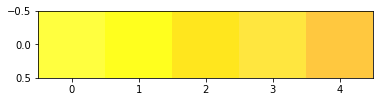

In [5]:
# Exemplo de pontos de "tonalidade" similar, mas representações distantes em RGB
# note como o resultado da modificação de uma coordenada é não trivial
cores_rgb = np.array([[
    [255,255,63], 
    [255,255,30], 
    [255,230,30], 
    [255,230,63], 
    [255,200,63] 
]], dtype=uint8)
imshow(cores_rgb); 

## Espaço HSV

O [espaço HSV](https://en.wikipedia.org/wiki/HSL_and_HSV#Examples) (Hue-Saturation-Value) foi desenvolvido para tornar a manipulação de cores mais intuitiva e próxima da experiência cotidiana (quando mexemos com tintas, por exemplo). Nesse espaço cada ponto é representado pela sua matiz (indicando a proximadade com uma cor), saturação (indicando a vibrância da cor) e valor (indicando a luminosidade).

<figure>
    <div style="text-align: center">
        <img src="img/hsv.png" width="300px">
    </div>
</figure>

Dado um ponto $(R,G,B)$ no espaço RGB, obtemos sua representação $(H,S,V)$ da seguinte forma.
$V=\max(R,G,B)$ é o valor máximo de uma cor no espaço RGB.
Seja $C=V-L$ com $L=\min(R,G,B)$ (esse valor é conhecido como croma), então $S=V/C$ se $C \neq 0$ e $S=0$ caso contrário.
Por fim, a matiz (_hue_) $H$ é obtida projetando o espaço RGB no hiperplano perpendicular ao vértice preto (0,0,0) e introduzindo coordenadas polares:
$$
H = 60 \times \begin{cases} (G-B)/C \mod 6 & \text{se } V = R \\ (B-R)/C + 2 & \text{se } V = G \\ (R-G)/C + 4& \text{se } V = B \end{cases}
$$

O valor $H$ é indefinido se $C=0$ (ou seja, para tons de cinza). 

In [6]:
def hsv(img):
    "Transforma imagem RGB em HSV (de maneira muito ineficiente!)"
    M, N = img.shape[0], img.shape[1]
    H = np.zeros((img.shape[0],img.shape[1],3), dtype=uint8)
    for i in range(M):
        for j in range(N):
            V = max(img[i,j,0],img[i,j,1],img[i,j,2])
            L = min(img[i,j,0],img[i,j,1],img[i,j,2])
            C = V-L
            if V == img[i,j,0]:
                Hp = ((img[i,j,1]-img[i,j,2])/C) % 6
            elif V == img[i,j,1]:
                Hp = (img[i,j,2]-img[i,j,0])/C + 2
            else:
                Hp = (img[i,j,0]-img[i,j,1])/C + 4
            H[i,j,0] = 60*Hp # hue
            H[i,j,1] = V/C
            H[i,j,2] = V
    return H

In [7]:
cores_hsv = hsv(cores_rgb)
print(cores_hsv) # note como os pontos em HSV possuem valores mais próximos e fáceis de interpretar
# alguns pontos são indistinguíveis por conta da representação em inteiros de 8 bits

[[[ 60   1 255]
  [ 60   1 255]
  [ 53   1 255]
  [ 52   1 255]
  [ 42   1 255]]]


## OpenCV

No lugar da função (ineficiente acima), vamos utilizar a função `cvtColor` da biblioteca OpenCV. Diferentemente da fórmula acima, essa função mapeia a matiz (H) no intervalo [0,180], ou seja, os valores são divididos por 2. O intervalo de valores adotados pelo OpenCV para cada dimensão são:

* Hue: [0,180]
* Saturation: [0,255]
* Value: [0,255]

In [8]:
hsv = cv2.cvtColor(np.array(cores_rgb,dtype=uint8), cv2.COLOR_RGB2HSV)
print(hsv) # note que a primeira coordenada possui seus valores dividos por 2 com relação a função hsv

[[[ 30 192 255]
  [ 30 225 255]
  [ 27 225 255]
  [ 26 192 255]
  [ 21 192 255]]]


## Filtro por cor

Podemos utilizar os valores de _hue_ para filtrar os pontos da imagem dentro de uma tonalidade. A função [`inRange`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981) da biblioteca OpenCV recebe uma imagem e um intervalo no espaço HSV e devolve uma matriz de 0s e 255s contendo os pontos cujos valores no espaço HSV estão na faixa dada. Vamos usar tal filtro para encontrar os patos nas imagens.

In [109]:
# Intervalo para pontos amarelados (H em [5,30]) 
lower_hsv = np.array([5, 100, 100])    
upper_hsv = np.array([30, 255, 255])

In [105]:
# obter representação HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
# Construir máscara dos pontos no hiperretângulo do espaço HSV especificado
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
print(mask) # matriz de 0s e 255s
print(mask.min(), mask.max())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0 255


A função [`bitwise_and`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14) recebe duas imagens `img1` e `img2` e uma máscara, e devolve a conjunção lógica de bits ponto a ponto das imagens com a máscara

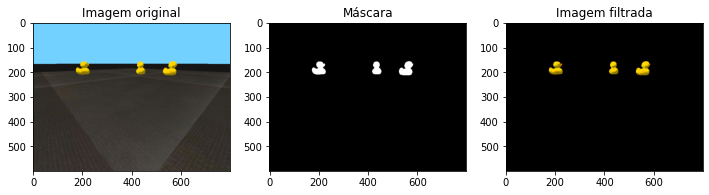

In [111]:
# Aplicar máscara na imagem (representada em RGB)
masked = cv2.bitwise_and(img[:,:,:3], img[:,:,:3], mask=mask)
f, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].imshow(img);
ax[0].set_title('Imagem original');
ax[1].imshow(mask, cmap='gray');
ax[1].set_title('Máscara');
ax[2].imshow(masked[:,:,:3]);
ax[2].set_title('Imagem filtrada');

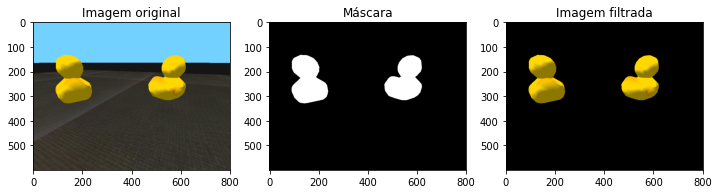

In [113]:
# Exemplo de imagem com patos mais próximos
img_sim = cv2.cvtColor(cv2.imread('img/sim3.png'), cv2.COLOR_BGR2RGB)
hsv_sim = cv2.cvtColor(img_sim, cv2.COLOR_RGB2HSV)
mask_sim = cv2.inRange(hsv_sim, lower_hsv, upper_hsv)
masked_sim = cv2.bitwise_and(img_sim, img_sim, mask=mask_sim)
f, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].imshow(img_sim);
ax[0].set_title('Imagem original');
ax[1].imshow(mask_sim, cmap='gray');
ax[1].set_title('Máscara');
ax[2].imshow(masked_sim);
ax[2].set_title('Imagem filtrada');

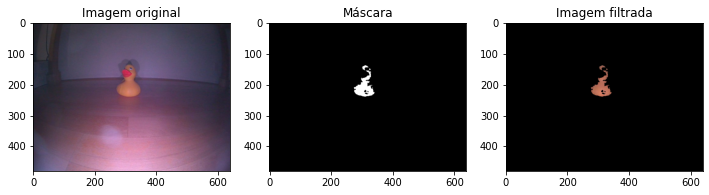

In [12]:
# Vamos carregar uma imagem obitida de uma foto (que introduz uma coloração avermelhada à imagem)
img_real = cv2.cvtColor(cv2.imread('img/oneduck.jpg'), cv2.COLOR_BGR2RGB)
hsv_real = cv2.cvtColor(img_real, cv2.COLOR_RGB2HSV)
mask_real = cv2.inRange(hsv_real, lower_hsv, upper_hsv)
masked_real = cv2.bitwise_and(img_real, img_real, mask=mask_real)
f, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].imshow(img_real);
ax[0].set_title('Imagem original');
ax[1].imshow(mask_real, cmap='gray');
ax[1].set_title('Máscara');
ax[2].imshow(masked_real);
ax[2].set_title('Imagem filtrada');

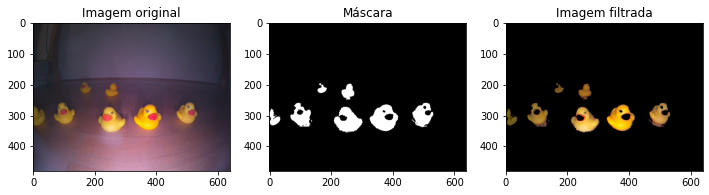

In [13]:
# Outra imagem real
img_real = cv2.cvtColor(cv2.imread('img/manyduckies.jpg'), cv2.COLOR_BGR2RGB)
hsv_real = cv2.cvtColor(img_real, cv2.COLOR_RGB2HSV)
mask_real = cv2.inRange(hsv_real, lower_hsv, upper_hsv)
masked_real = cv2.bitwise_and(img_real, img_real, mask=mask_real)
f, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].imshow(img_real);
ax[0].set_title('Imagem original');
ax[1].imshow(mask_real, cmap='gray');
ax[1].set_title('Máscara');
ax[2].imshow(masked_real);
ax[2].set_title('Imagem filtrada');

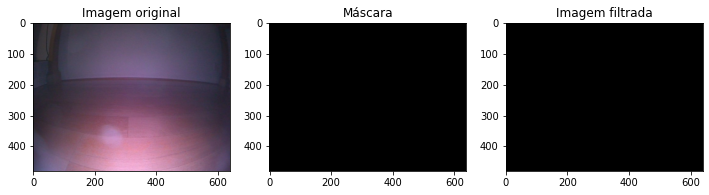

In [14]:
# Uma imagem real sem patos (mascara deveria ser nula)
img_real = cv2.cvtColor(cv2.imread('img/noduckies.jpg'), cv2.COLOR_BGR2RGB)
hsv_real = cv2.cvtColor(img_real, cv2.COLOR_RGB2HSV)
mask_real = cv2.inRange(hsv_real, lower_hsv, upper_hsv)
masked_real = cv2.bitwise_and(img_real, img_real, mask=mask_real)
f, ax = plt.subplots(1,3, figsize=(12,5))
ax[0].imshow(img_real);
ax[0].set_title('Imagem original');
ax[1].imshow(mask_real, cmap='gray');
ax[1].set_title('Máscara');
ax[2].imshow(masked_real);
ax[2].set_title('Imagem filtrada');

## Segmentando marcações de pista

Escreva agora funções que identifiquem nas imagens abaixo as faixas brancas e amarelas na imagem (um para cada).

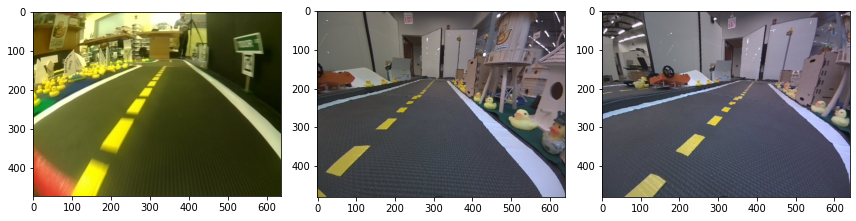

In [31]:
img_rgb = [ cv2.imread('img/pista.jpg'), 
            cv2.imread('img/pista1.png'), 
            cv2.imread('img/pista2.png') ]
_, ax = plt.subplots(1,3,figsize=(12,5))
for i in range(3):
    ax[i].imshow( cv2.cvtColor(img_rgb[i], cv2.COLOR_BGR2RGB) );
plt.tight_layout()

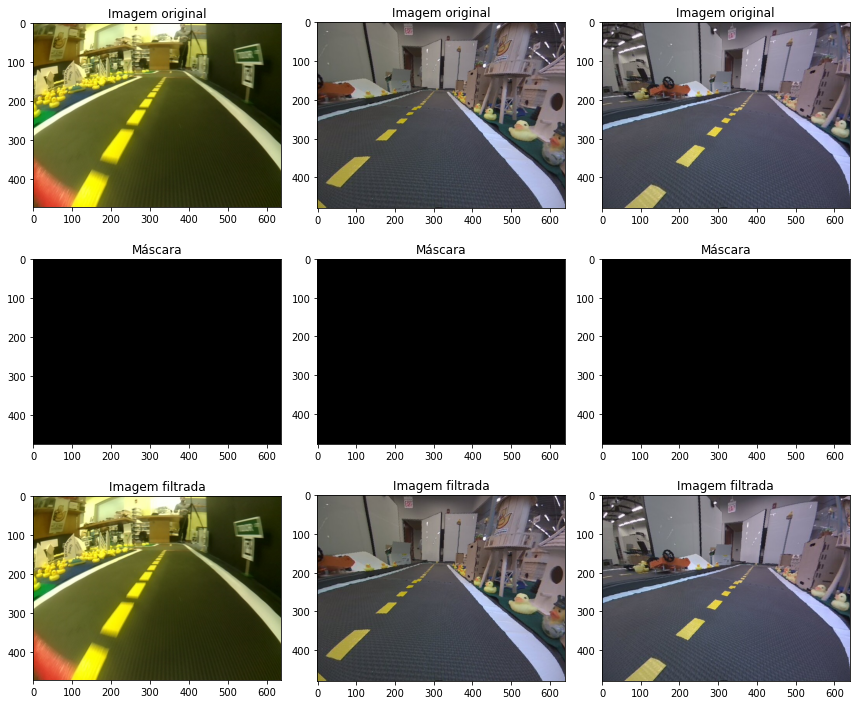

In [47]:
# Filtro para faixa tracejada central
amarelo_i = np.array([0, 0, 0])       # Modificar
amarelo_s = np.array([179, 255, 255]) # Modificar

_, ax = plt.subplots(3,3,figsize=(12,10))
for i in range(3):
    img_hsv_a = cv2.cvtColor(img_rgb[i], cv2.COLOR_BGR2HSV)
    mascara_a = cv2.inRange(img_hsv_a, amarelo_i, amarelo_s)
    img_amarela = cv2.bitwise_and(img_rgb[i], img_rgb[i], mask=mascara_a)
    ax[0,i].imshow(cv2.cvtColor(img_rgb[i], cv2.COLOR_BGR2RGB));
    ax[0,i].set_title('Imagem original');
    ax[1,i].imshow(mascara_a, cmap='gray');
    ax[1,i].set_title('Máscara');
    ax[2,i].imshow(cv2.cvtColor(img_amarela, cv2.COLOR_BGR2RGB));
    ax[2,i].set_title('Imagem filtrada');
plt.tight_layout()

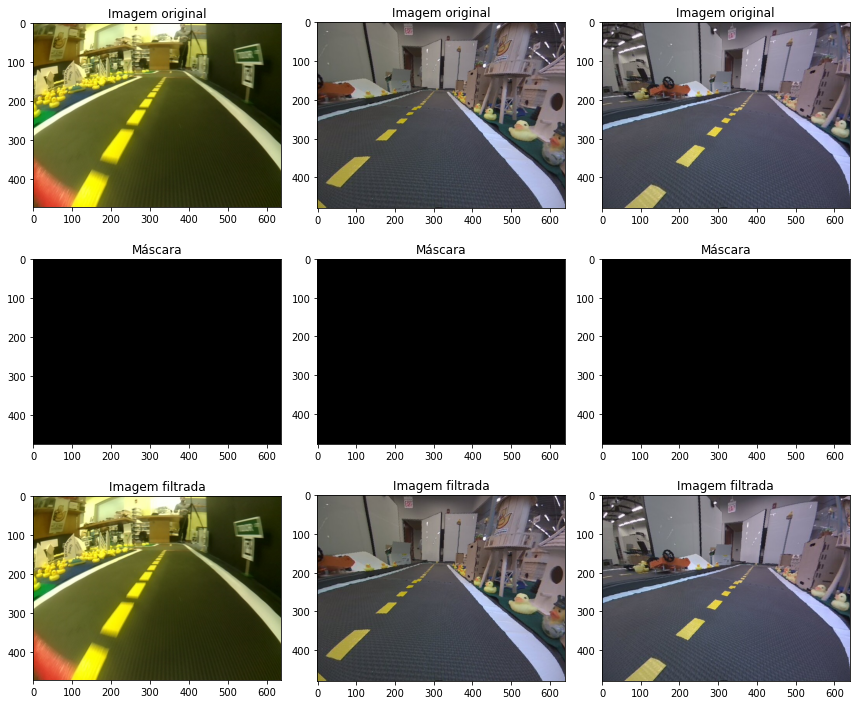

In [48]:
# Filtro para faixa contínua branca
branco_i = np.array([0, 0, 0])        # Modificar
branco_s = np.array([179, 255, 255])  # Modificar

_, ax = plt.subplots(3,3,figsize=(12,10))
for i in range(3):
    img_hsv_b = cv2.cvtColor(img_rgb[i], cv2.COLOR_BGR2HSV)
    mascara_b = cv2.inRange(img_hsv_b, branco_i, branco_s)
    img_branco = cv2.bitwise_and(img_rgb[i], img_rgb[i], mask=mascara_b)
    ax[0,i].imshow(cv2.cvtColor(img_rgb[i], cv2.COLOR_BGR2RGB));
    ax[0,i].set_title('Imagem original');
    ax[1,i].imshow(mascara_b, cmap='gray');
    ax[1,i].set_title('Máscara');
    ax[2,i].imshow(cv2.cvtColor(img_branco, cv2.COLOR_BGR2RGB));
    ax[2,i].set_title('Imagem filtrada');
plt.tight_layout()